In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

In [116]:
N_NEIGHBOR = 5
N_SAMPLES = 30

In [117]:
x_1 = np.random.randint(10, size=N_SAMPLES)
x_2 = np.random.randint(9, high=25, size=N_SAMPLES)
y_1 = x_1*np.random.random(N_SAMPLES) + 3
y_2 = x_2*np.random.random(N_SAMPLES) - 5

data_0 = pd.DataFrame()
data_0['x_1'] = x_1
data_0['x_2'] = y_1
data_0['y'] = 0
data_1 = pd.DataFrame()
data_1['x_1'] = x_2
data_1['x_2'] = y_2
data_1['y'] = 1

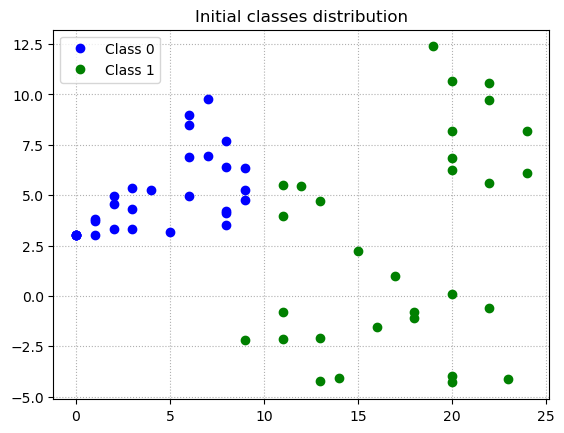

In [118]:
mpl.plot(x_1, y_1, 'bo', label='Class 0')
mpl.plot(x_2, y_2, 'go', label='Class 1')
mpl.grid(linestyle=':')
mpl.title('Initial classes distribution')
mpl.legend();

In [138]:
data = pd.concat((data_0, data_1), axis=0)

,x_1,x_2,y
0,2,4.956686,0
1,6,4.975929,0
2,8,6.404008,0
3,7,9.770328,0
4,3,4.334934,0
5,6,8.482566,0
6,0,3.000000,0
7,8,3.496781,0
8,2,3.328437,0
9,2,4.552332,0


In [120]:
def distance(vect_a, vect_b):
    dist = (((vect_a - vect_b)**2).sum())**0.5
    return dist

def manh_distance(vect_a, vect_b):
    dist = np.abs(vect_a - vect_b).sum()
    return dist

In [121]:
# defining a new sample coords
x_n1 = np.random.randint(0, high=25)
x_n2 = np.random.randint(low=-10, high=10)
new_sample = np.array([x_n1, x_n2])

In [140]:
# calculating distance between new sample and all the data points
data['dist_to_sample'] = '0'
data['manh_distance'] = '0'
for i in range(len(data)):
    data.iloc[i, 3] = distance(data.iloc[i, :-3], new_sample)
    data.iloc[i, 4] = manh_distance(data.iloc[i, :-3], new_sample)

n_neighbor_data = data.sort_values(by='dist_to_sample')[:N_NEIGHBOR]
# n_neighbor_data_1 = data.sort_values(by='manh_distance')[:N_NEIGHBOR]
# prev_class = mode(n_neighbor_data['y'])
if (n_neighbor_data['y'] == 1).mean() >= 0.5:
    result = 'New sample belongs to class 1'
else:
    result = 'New sample belongs to class 0'

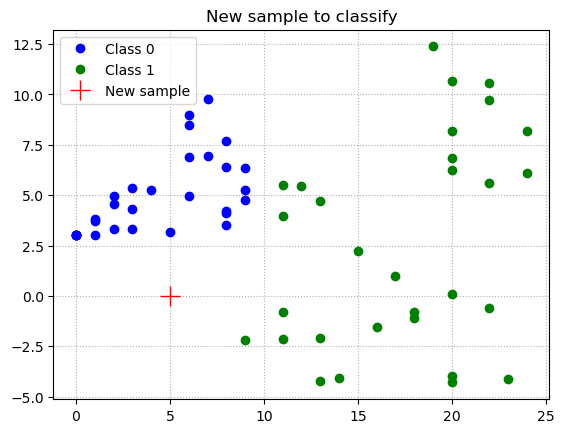

In [123]:
mpl.plot(x_1, y_1, 'bo', label='Class 0')
mpl.plot(x_2, y_2, 'go', label='Class 1')
mpl.plot(new_sample[0], new_sample[1], 'r+', markersize=14, label='New sample')
mpl.grid(linestyle=':')
mpl.title('New sample to classify')
mpl.legend();

In [124]:
print('Result of kNN method with number of neighbors to bear in mind =', N_NEIGHBOR, '\n', result)
n_neighbor_data

Result of kNN method with number of neighbors to bear in mind = 5 
 New sample belongs to class 0


,x_1,x_2,y,dist_to_sample,manh_distance
13,5,3.179544,0,3.179544,3.179544
21,3,3.312712,0,3.869634,5.312712
8,2,3.328437,0,4.480903,6.328437
0,9,-2.166578,1,4.549073,6.166578
7,8,3.496781,0,4.607328,6.496781
